<a href="https://colab.research.google.com/github/amaluvincent/Applied-data-science-/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Setting Up the Environment
You will need to install the following libraries:

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk
!pip install tensorflow keras


# Importing libraries

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import chi2
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Load dataset

In [5]:
# Load the ISOT dataset
true_news = pd.read_csv('/content/True.csv')
fake_news = pd.read_csv('/content/Fake.csv')

# Add a label to each dataframe
true_news['label'] = 0  # 0 for legitimate news
fake_news['label'] = 1  # 1 for fake news

# Combine both datasets
df = pd.concat([true_news, fake_news], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle the data


# 4. Data Preprocessing
a. Removing Stopwords, Lemmatization, and Cleaning Text

In [6]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    # Tokenize text
    words = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetical tokens
    words = [word for word in words if word.isalpha() and word not in stop_words]
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply preprocessing to the 'text' column
df['clean_text'] = df['text'].apply(preprocess_text)


# 5. Exploratory Data Analysis (EDA)
a. Distribution of Fake and Real News

<ipython-input-7-f8b8b4bcea1e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette=['#2ecc71', '#e74c3c'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


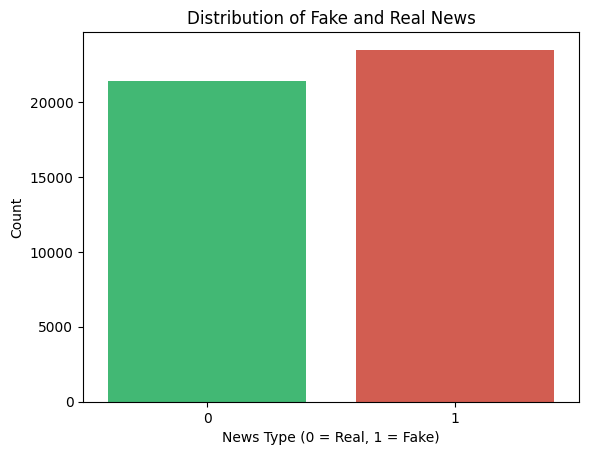

In [7]:
sns.countplot(x='label', data=df, palette=['#2ecc71', '#e74c3c'])
plt.title('Distribution of Fake and Real News')
plt.xlabel('News Type (0 = Real, 1 = Fake)')
plt.ylabel('Count')
plt.show()


b. Word Cloud Visualization for Fake News and Real News

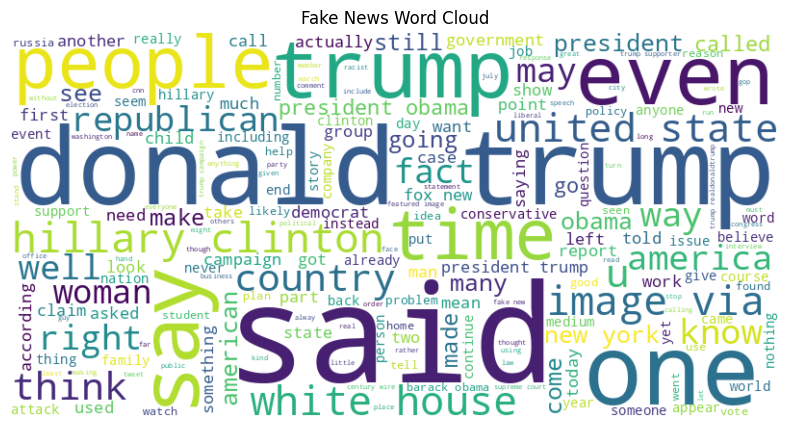

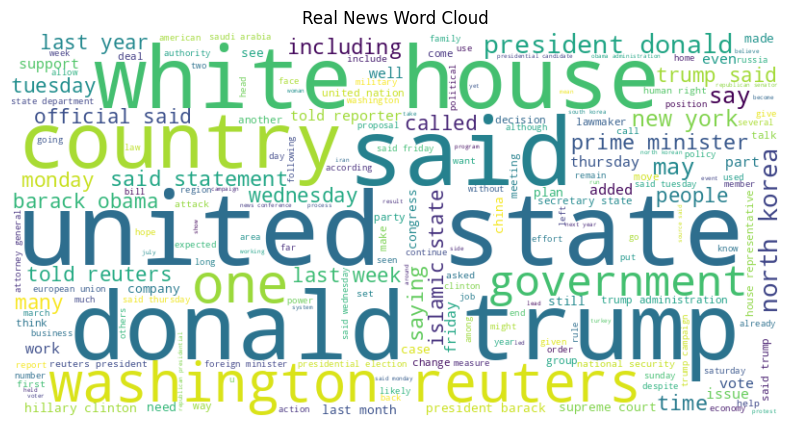

In [8]:
from wordcloud import WordCloud

# Fake News WordCloud
fake_words = ' '.join(df[df['label'] == 1]['clean_text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud')
plt.show()

# Real News WordCloud
real_words = ' '.join(df[df['label'] == 0]['clean_text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Real News Word Cloud')
plt.show()


c. Top Words in Fake vs Real News

In [9]:
from collections import Counter

# Fake News Word Frequency
fake_words = ' '.join(df[df['label'] == 1]['clean_text']).split()
counter_fake = Counter(fake_words)
print("Top 10 words in Fake News:", counter_fake.most_common(10))

# Real News Word Frequency
real_words = ' '.join(df[df['label'] == 0]['clean_text']).split()
counter_real = Counter(real_words)
print("Top 10 words in Real News:", counter_real.most_common(10))


Top 10 words in Fake News: [('trump', 74403), ('said', 31149), ('president', 26340), ('people', 26098), ('one', 23812), ('would', 23461), ('state', 22072), ('clinton', 18717), ('like', 18207), ('obama', 17920)]
Top 10 words in Real News: [('said', 99037), ('trump', 54280), ('state', 36243), ('would', 31526), ('reuters', 28412), ('president', 26939), ('republican', 22098), ('government', 19433), ('year', 18721), ('house', 16906)]


# 6. TF-IDF Vectorization for Text

In [10]:
# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['clean_text']).toarray()

# Features and Labels
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# 7. Model Building
a. Logistic Regression Model

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


b. Random Forest Model

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


# 8. LSTM Model


In [ ]:
# Tokenization for LSTM
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['clean_text'])

X_lstm = tokenizer.texts_to_sequences(df['clean_text'])
X_lstm = pad_sequences(X_lstm, maxlen=200)

# Train-test split for LSTM
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y, test_size=0.25, random_state=42)

# LSTM Model
model = Sequential()
model.add(Embedding(5000, 128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Training
history = model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=64, validation_data=(X_test_lstm, y_test_lstm))

# LSTM Evaluation
loss, accuracy = model.evaluate(X_test_lstm, y_test_lstm)
print("LSTM Accuracy:", accuracy)


# 9. Feature Importance Analysis
a. Feature Importance for Logistic Regression

In [ ]:
# Get the most important features from logistic regression
coefficients = logreg.coef_[0]
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the top 10 most important features
top_features = sorted(zip(coefficients, feature_names), reverse=True)[:10]
print("Top 10 most important features for Fake News Detection (Logistic Regression):")
for coef, feat in top_features:
    print(f"{feat}: {coef}")


b. Feature Importance for Random Forest

In [ ]:
# Feature importance from Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features
top_rf_features = [tfidf_vectorizer.get_feature_names_out()[i] for i in indices]

print("Top 10 most important features for Fake News Detection (Random Forest):")
for feature in top_rf_features:
    print(feature)


# 10. Visualize Feature Importance

In [ ]:
# Bar plot for Logistic Regression feature importance
top_features_logreg = pd.DataFrame(top_features, columns=['Importance', 'Feature'])
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=top_features_logreg)
plt.title('Top 10 Features (Logistic Regression)')
plt.show()

# Bar plot for Random Forest feature importance
top_features_rf = pd.DataFrame({'Feature': top_rf_features, 'Importance': importances[indices]})
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=top_features_rf)
plt.title('Top 10 Features (Random Forest)')
plt.show()
